In [14]:
#!pip install tensorflow --ignore-installed --user
#!pip install -U keras

CNN(Convolutional Neural Network)

In [29]:
import keras
#Data set training and test
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [30]:
#validation set
from sklearn.model_selection import train_test_split
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.175)

In [31]:
# model set
#generalization performance
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [35]:
#resize
# 28 x 28 image scale 1ch:grayscale→28,28,1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

#one-hot vector
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [36]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
469/469 [==============================] - 40s 86ms/step - loss: 1.2520 - accuracy: 0.5809 - val_loss: 0.3581 - val_accuracy: 0.8947
Epoch 2/10
469/469 [==============================] - 43s 93ms/step - loss: 0.4553 - accuracy: 0.8619 - val_loss: 0.2670 - val_accuracy: 0.9171
Epoch 3/10
469/469 [==============================] - 47s 100ms/step - loss: 0.3718 - accuracy: 0.8878 - val_loss: 0.2057 - val_accuracy: 0.9394
Epoch 4/10
469/469 [==============================] - 49s 104ms/step - loss: 0.3282 - accuracy: 0.9007 - val_loss: 0.1790 - val_accuracy: 0.9474
Epoch 5/10
469/469 [==============================] - 47s 100ms/step - loss: 0.3043 - accuracy: 0.9083 - val_loss: 0.1594 - val_accuracy: 0.9562
Epoch 6/10
469/469 [==============================] - 46s 97ms/step - loss: 0.2854 - accuracy: 0.9144 - val_loss: 0.1494 - val_accuracy: 0.9570
Epoch 7/10
469/469 [==============================] - 46s 99ms/step - loss: 0.2685 - accuracy: 0.9208 - val_loss: 0.1402 - val_accura

In [37]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12334264814853668
Test accuracy: 0.9642000198364258


In [45]:
#history data label
history.history.keys() 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

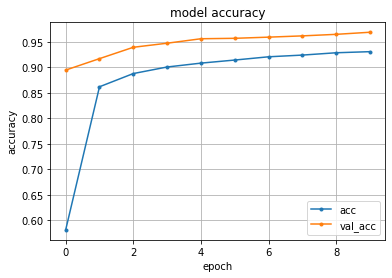

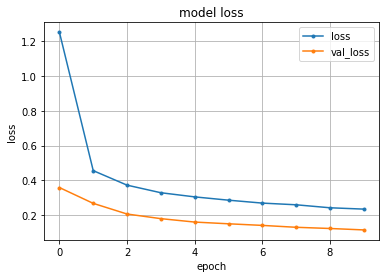

In [46]:
from matplotlib import pyplot as plt

# accuracy plot
plt.plot(history.history['accuracy'], marker='.', label='acc')
plt.plot(history.history['val_accuracy'], marker='.', label='val_acc')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

# Loss plot
plt.plot(history.history['loss'], marker='.', label='loss')
plt.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('model loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()